In [55]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [56]:
# !gdown 1h99toeF7lZ2I3iJwehgKO-QQmDaOe_O3 # test dataset
# !gdown 1XL0VTygpZj-ZAuTNRBgApZTPQyNDnT-v # train dataset

In [57]:
df_train = pd.read_csv('game_of_thrones_train.csv', index_col = 'S.No')
df_test = pd.read_csv('game_of_thrones_test.csv', index_col = 'S.No')

df_train_copy = df_train.copy(deep=True)
df_test_copy = df_test.copy(deep=True)

In [58]:
columns_with_na = ['mother', 'father', 'heir', 'spouse', 'isAliveMother', 'isAliveFather', \
                   'isAliveHeir', 'isAliveSpouse',]
df_train.drop(columns=columns_with_na, inplace=True) #удаляем колонки с NaN

In [59]:
from sklearn.preprocessing import LabelEncoder
label_encoding = LabelEncoder()

In [60]:
pd.set_option('display.max_columns', None) #опция, чтобы отображались все колонки датасета

In [61]:
#создадим признак isAliveByAge на основе признаков dateOfBirth и age.
#если сумма dateOfBirth и age будет равна 305 (нынешний год), это значит, что персонаж скорее всего жив. Такой ситуации мы присвоим код 1.
#если сумма dateOfBirth и age будет меньше 305, это значит, что персонаж "достиг своего конечного возраста" раньше,
#чем наступил 305  (нынешний) год, то есть умер. Присвоим такой ситуации код -1.
#NaN'ам в dateOfBirth и age мы присвоим значение 0.

isAliveByAge = []
isDeadByAge = []
for index, row in df_train.iterrows():
    if df_train['dateOfBirth'].isna()[index] or df_train['age'].isna()[index]:
        isAliveByAge.append(0)
        isDeadByAge.append(0)
    elif row['dateOfBirth'] + row['age'] == 305:
        isAliveByAge.append(1)
        isDeadByAge.append(0)
    else:
        isAliveByAge.append(0)
        isDeadByAge.append(1)

In [62]:
df_train['isPopular'] = (df_train['popularity'] >= 0.5).astype(int) #создаем признак isPopular на основе признака popularity
df_train['boolDeadRelations'] = (df_train['numDeadRelations'] > 0).astype(int)  #создаем булевый признак boolDeadRelations
                                                                                #на основе признака numDeadRelations
df_train['isAliveByAge'] = isAliveByAge
df_train['isDeadByAge'] = isDeadByAge

In [63]:
cult = {
    'Summer Islands': ['summer islands', 'summer islander', 'summer isles'],
    'Ghiscari': ['ghiscari', 'ghiscaricari',  'ghis'],
    'Asshai': ["asshai'i", 'asshai'],
    'Lysene': ['lysene', 'lyseni'],
    'Andal': ['andal', 'andals'],
    'Braavosi': ['braavosi', 'braavos'],
    'Dornish': ['dornishmen', 'dorne', 'dornish'],
    'Myrish': ['myr', 'myrish', 'myrmen'],
    'Westermen': ['westermen', 'westerman', 'westerlands'],
    'Westerosi': ['westeros', 'westerosi'],
    'Stormlander': ['stormlands', 'stormlander'],
    'Norvoshi': ['norvos', 'norvoshi'],
    'Northmen': ['the north', 'northmen'],
    'Free Folk': ['wildling', 'first men', 'free folk', 'Free folk'],
    'Qartheen': ['qartheen', 'qarth'],
    'Reach': ['the reach', 'reach', 'reachmen'],
}

for i in cult: #объединяем похожие названия культур и приводим их к нижнему регистру
    cur_cult = df_train['culture'].str.lower()
    df_train['culture'] = cur_cult.replace(cult[i], i.lower())

In [64]:
df_train = df_train.drop(columns=['name', 'numDeadRelations', 'popularity', 'age', 'dateOfBirth']) #Удаляем ненужные столбцы

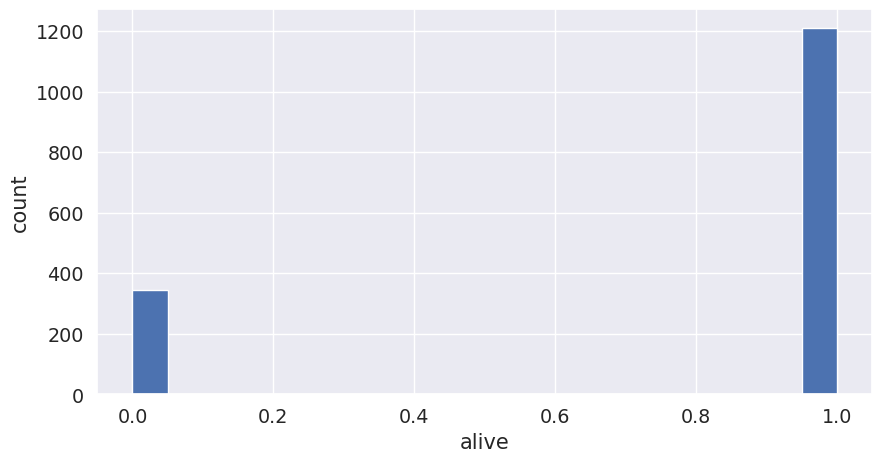

In [65]:
class_counts = df_train['male'].value_counts()
class_counts

plt.figure(figsize = (10, 5))

df_train['isAlive'].hist(density=False, bins=20)
plt.ylabel('count')
plt.xlabel('alive')

# plt.suptitle('Distribution of Survived')
plt.show()

#как видно, датасет несбалансирован (пока попробую продолжать работать с ним)
#возможно придется менять логику взаимодействия с NaN, чтобы изменить получившийя датасет

In [66]:
#Выделим самые значимые "дома" в отдельные признаки

houses = []
top10 = df_train.house.value_counts().head(10).index.tolist()
for index, row in df_train.iterrows():
    if df_train['house'].isna()[index]:
        houses.append(0)
    elif row['house'] in top10:
        houses.append(top10.index(row['house']) + 1)
    else:
        houses.append(11)

In [67]:
df_train['house'] = houses

In [68]:
#Выделим самые значимые "культуры" в отдельные признаки

cultures = []
top7 = df_train.culture.value_counts().head(7).index.tolist()
for index, row in df_train.iterrows():
    if df_train['culture'].isna()[index]:
        cultures.append(0)
    elif row['culture'] in top7:
        cultures.append(top7.index(row['culture']) + 1)
    else:
        cultures.append(8)


In [69]:
df_train['culture'] = cultures

In [70]:
#Выделим самые значимые "титулы" в отдельные признаки

titles = []
top15 = ['Ser', 'Maester', 'Septon', 'Winterfell', 'Lady', 'Princess', 'Prince']
for index, row in df_train.iterrows():
    if df_train['title'].isna()[index]:
        titles.append(0)
    elif row['title'] in top15:
        titles.append(top15.index(row['title']) + 1)
    else:
        titles.append(8)


In [71]:
df_train['title'] = titles

В этом датасете не осталось количественных признаков


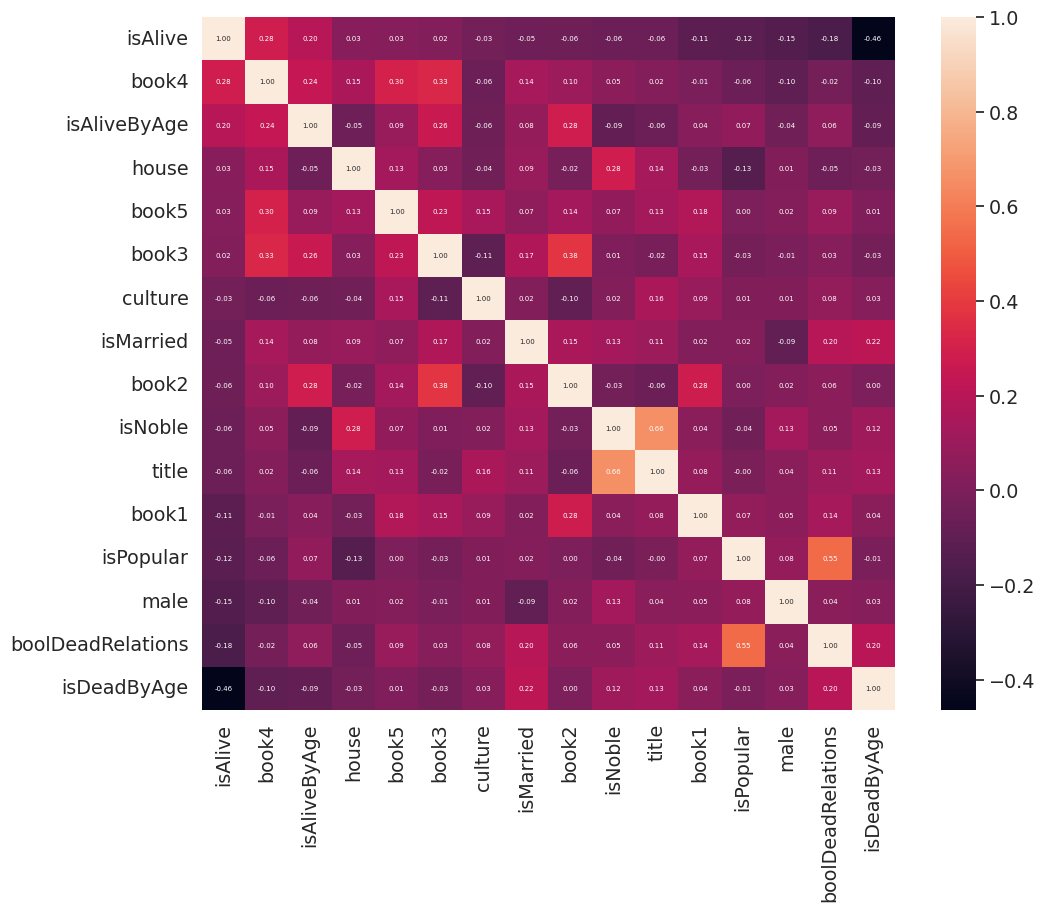

In [72]:
corrmat = df_train.corr()
f, ax = plt.subplots(figsize=(12, 9))
# sns.heatmap(corrmat, vmax=.8, square=True);

k = 40 # number of variables for heatmap
cols = corrmat.nlargest(k, 'isAlive')['isAlive'].index
cm = np.corrcoef(df_train[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 5}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

Как видно, признаки boolDeadRelations и isPopular коррелируют между собой, следовательно один из признаков стоило бы удалить.

Однако опытным путем удалось понять, что датасет с двумя признаками в среднем показывает лучший результат (по accuracy), чем датасет с только одним оставленным признаком

In [73]:
# df_train = df_train.drop(columns=['boolDeadRelations']) #Удаляем ненужные столбцы, поскольку между признаками boolDeadRelations и isPopular видна достаточно сильная корреляция
# df_train = df_train.drop(columns=['isPopular'])

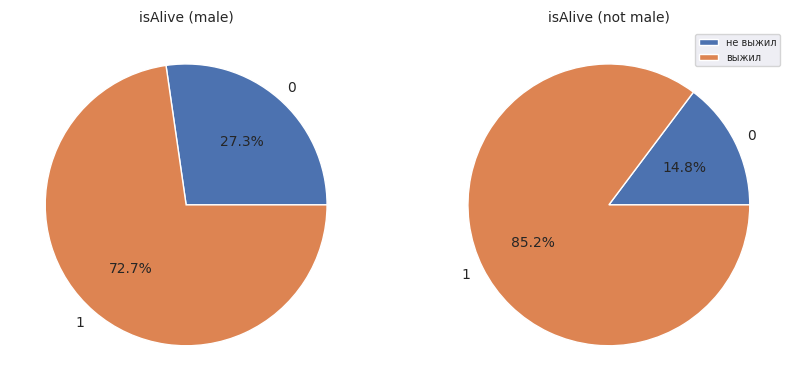

In [74]:
data_1 = df_train[df_train['male']== 1]['isAlive'].value_counts().sort_values()
data_2 = df_train[df_train['male']== 0]['isAlive'].value_counts().sort_values()

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 8))

ax1.pie(data_1.values, labels=data_1.index, autopct='%1.1f%%', textprops={'fontsize': 10})
ax2.pie(data_2.values, labels=data_2.index, autopct='%1.1f%%', textprops={'fontsize': 10})

ax1.set_title('isAlive (male)', fontsize=10)
ax2.set_title('isAlive (not male)', fontsize=10)

plt.legend(['не выжил', 'выжил'], fontsize=7)

plt.show() #проанализирум влияние признака male на целевой признак

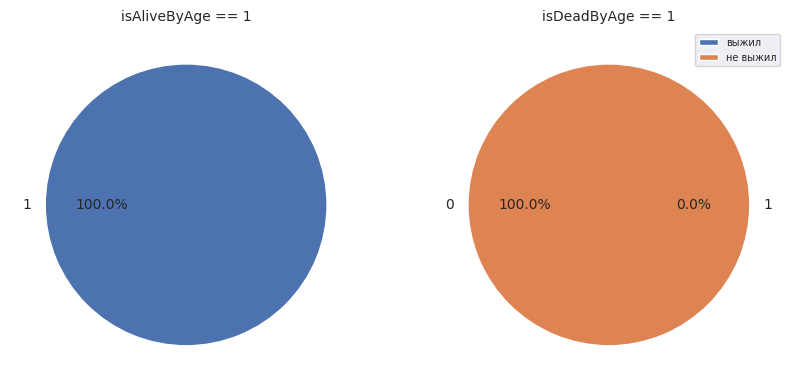

In [75]:
data_1 = df_train[df_train['isAliveByAge']== 1]['isAlive'].value_counts()
data_2 = df_train[df_train['isDeadByAge']== 1]['isAlive'].value_counts()
data_2.loc[1] = 0
data_2 = data_2.sort_values()
# data_3 = df_train[df_train['house_1']== 1]['isAlive'].value_counts()

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 10))

ax1.pie(data_1.values, labels=data_1.index, autopct='%1.1f%%', textprops={'fontsize': 10})
ax2.pie(data_2.values, labels=data_2.index, autopct='%1.1f%%', textprops={'fontsize': 10})
# ax3.pie(data_3.values, labels=data_3.index, autopct='%1.1f%%', textprops={'fontsize': 10})

ax1.set_title('isAliveByAge == 1', fontsize=10)
ax2.set_title('isDeadByAge == 1', fontsize=10)
# ax3.set_title('house_1 == 1', fontsize=10)

plt.legend(['выжил', 'не выжил'], fontsize=7)

plt.show() #проанализирум влияние признаков isAliveByAge, isDeadByAge, house_1 на целевой признак

In [76]:
from sklearn.preprocessing import OneHotEncoder

In [77]:
encoder = OneHotEncoder(sparse_output=False)

one_hot_encoded = encoder.fit_transform(df_train[['house', 'culture', 'title']])

one_hot_df = pd.DataFrame(one_hot_encoded, columns=encoder.get_feature_names_out(['house', 'culture', 'title']), index=df_train.index)

In [78]:
df_encoded = pd.concat([df_train, one_hot_df], axis=1)
df_train = df_encoded.drop(['house', 'culture', 'title'], axis=1)

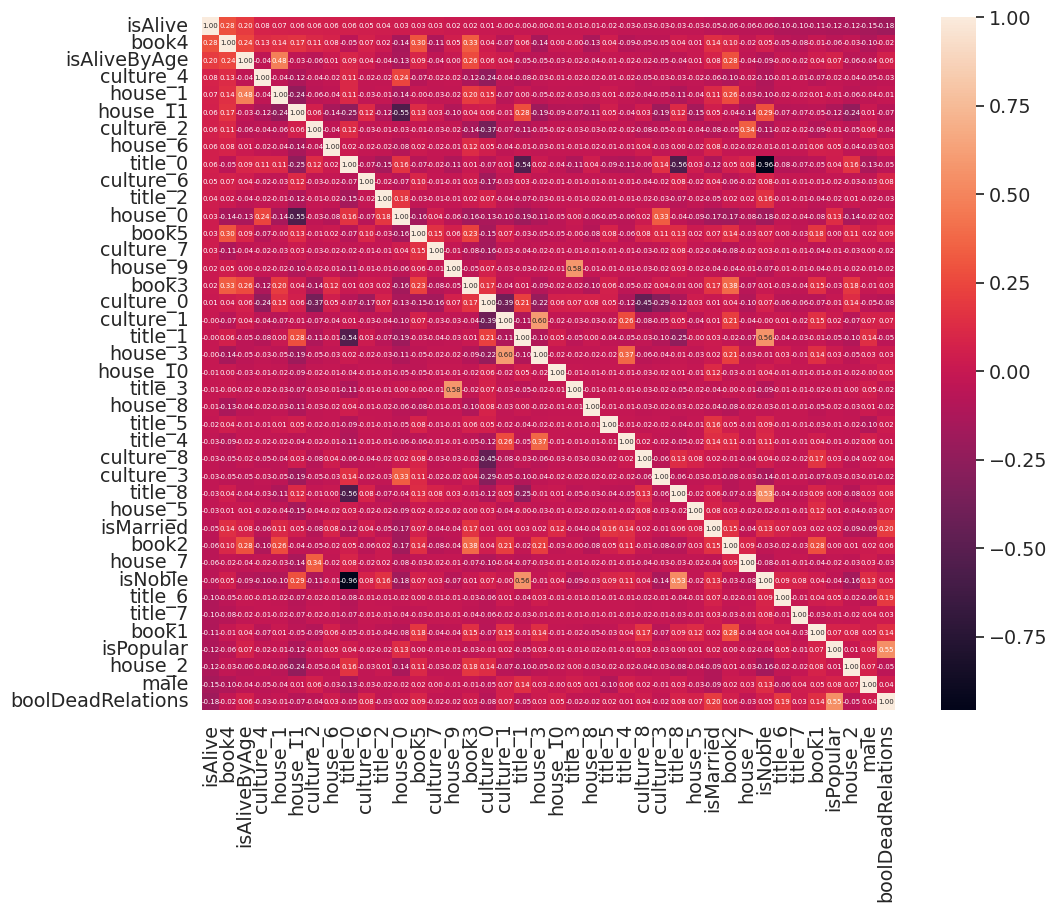

In [79]:
#проанализируем корреляцию между оставшимися признаками
corrmat = df_train.corr()
f, ax = plt.subplots(figsize=(12, 9))
# sns.heatmap(corrmat, vmax=.8, square=True);

k = 40 # number of variables for heatmap
cols = corrmat.nlargest(k, 'isAlive')['isAlive'].index
cm = np.corrcoef(df_train[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 5}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

In [80]:
X = df_train.drop(columns=['isAlive']).values
y = df_train['isAlive'].values

In [81]:
from sklearn.model_selection import train_test_split

In [82]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, stratify=y, random_state = 10)

In [83]:
X_train, X_val, y_train, y_val = train_test_split(
    X_train, y_train,
    test_size=0.1,
    shuffle=True
) #выделим датасет для валидации

In [84]:
from sklearn.preprocessing import MinMaxScaler

In [85]:
#масштабируем данные
scaler = MinMaxScaler()
scaler.fit(X_train)
# X_train_scaled = scaler.transform(X_train)
# X_test_scaled = scaler.transform(X_test)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
X_val = scaler.transform(X_val)

In [86]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

from sklearn.model_selection import GridSearchCV

from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score, mean_absolute_error
from sklearn.metrics import make_scorer

In [87]:
#создадим словарь с моделями, чтобы прогнать их по метрикам и найти лучший вариант

dict_of_models = {}
# dict_of_models['lr'] = LogisticRegression(C = 1, max_iter = 1000, solver='lbfgs')
dict_of_models['lr'] = LogisticRegression(max_iter = 1000, solver='lbfgs')
dict_of_models['abc'] = AdaBoostClassifier(algorithm="SAMME")
dict_of_models['rfc'] = RandomForestClassifier()
dict_of_models['gpc'] = GaussianProcessClassifier()
dict_of_models['gnb'] = GaussianNB()
dict_of_models['knn'] = KNeighborsClassifier()
dict_of_models['svc'] = SVC()
dict_of_models['dtc'] = DecisionTreeClassifier()

dict_of_params = {}
dict_of_params['lr'] = {
    'C': [1, 2, 3],
    'max_iter': [1000, 900, 1100],
    'solver': ['lbfgs'],
    'tol': [0.0001, 0.00015],
}
dict_of_params['rfc'] = {
     'criterion': ['entropy'],
     'max_depth': [15],
     'min_samples_leaf': [2],
     'min_samples_split': [8, 7],
     'n_estimators': [100],
     'random_state': [15],
}
dict_of_params['svc'] = {
     'C': [1.0, 1.1, 1.2],
     'coef0': [0.0, 0.5, 1],
     'degree': [3, 5, 7],
     'max_iter': [-1],
     'tol': [0.001, 0.0015, 0.0005],
}
#с помощью GridSearchCV найдем лучшие гиперпараметры для модели (в данном случае - для логистической регрессии)
gridsearch = GridSearchCV(dict_of_models['lr'], dict_of_params['lr'], refit=True, scoring=make_scorer(accuracy_score))

# запустим поиск
gridsearch.fit(X_train, y_train)

# выведем наилучшие параметры
print(gridsearch.best_params_)
dict_of_models['lr'] = gridsearch.best_estimator_

{'C': 2, 'max_iter': 1000, 'solver': 'lbfgs', 'tol': 0.0001}


In [88]:
#пробежимся по всем моделям, чтобы оценить их метрики
for i in dict_of_models:
    dict_of_models[i].fit(X_train, y_train)

    y_pred = dict_of_models[i].predict(X_test)
    y_pred_train = dict_of_models[i].predict(X_train)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy of {i} train : %.4f" % accuracy_score(y_train, y_pred_train))
    print(f"Accuracy of {i} test : %.4f" % accuracy)
    MSE_train = mean_squared_error(y_train, y_pred_train)
    MSE_test = mean_squared_error(y_test, y_pred)
    print(f'MSE на обучении {MSE_train:.2f}')
    print(f'MSE на тесте {MSE_test:.2f}', end='\n\n')

Accuracy of lr train : 0.8598
Accuracy of lr test : 0.8301
MSE на обучении 0.14
MSE на тесте 0.17

Accuracy of abc train : 0.8571
Accuracy of abc test : 0.8237
MSE на обучении 0.14
MSE на тесте 0.18

Accuracy of rfc train : 0.9295
Accuracy of rfc test : 0.8077
MSE на обучении 0.07
MSE на тесте 0.19

Accuracy of gpc train : 0.8812
Accuracy of gpc test : 0.8141
MSE на обучении 0.12
MSE на тесте 0.19

Accuracy of gnb train : 0.8098
Accuracy of gnb test : 0.7628
MSE на обучении 0.19
MSE на тесте 0.24

Accuracy of knn train : 0.8589
Accuracy of knn test : 0.7917
MSE на обучении 0.14
MSE на тесте 0.21

Accuracy of svc train : 0.8723
Accuracy of svc test : 0.8237
MSE на обучении 0.13
MSE на тесте 0.18

Accuracy of dtc train : 0.9295
Accuracy of dtc test : 0.7756
MSE на обучении 0.07
MSE на тесте 0.22



Остановимся на модели логистической регрессии. (В словаре она имеет подзаголовок lr)

In [89]:
#посмотрим оценку работы модели на валидационном датасете
y_pred_val = dict_of_models['lr'].predict(X_val)
y_pred_train = dict_of_models['lr'].predict(X_train)
accuracy = accuracy_score(y_pred_val, y_val)
print(f"Accuracy of lr train : %.4f" % accuracy_score(y_train, y_pred_train))
print(f"Accuracy of lr test : %.4f" % accuracy)

Accuracy of lr train : 0.8598
Accuracy of lr test : 0.8480


In [90]:
#оценим работу модели с помощью кросс-валидации

from sklearn.model_selection import cross_validate

scores = cross_validate(dict_of_models['lr'], X, y, cv=5,
                        scoring={'r2': make_scorer(r2_score),
                        'accuracy_score': make_scorer(accuracy_score),
                        'mean_squared_error': make_scorer(mean_squared_error)},
                        return_train_score=True)

print('R2 train mean = ', scores['train_r2'].mean())
print('R2 test mean = ', scores['test_r2'].mean())

print('MSE train mean = ', scores['train_mean_squared_error'].mean())
print('MSE test mean = ', scores['test_mean_squared_error'].mean())

print('accuracy train mean = ', scores['train_accuracy_score'].mean())
print('accuracy test mean = ', scores['test_accuracy_score'].mean())

R2 train mean =  0.17056030999533262
R2 test mean =  0.12118639180562749
MSE train mean =  0.14306381223126857
MSE test mean =  0.15159534998763297
accuracy train mean =  0.8569361877687314
accuracy test mean =  0.848404650012367


In [91]:
#загрузим модель на диск
import pickle

filename = 'got_model_lr_v3_withtitles.sav'
pickle.dump(dict_of_models['lr'], open(filename, 'wb'))

In [92]:
# !gdown 1M14conWjAW2QLoyCXbHEAy8bql2f99eF

In [93]:
submission = pd.read_csv("submission.csv", index_col='S.No')

In [94]:
df_test = pd.read_csv('game_of_thrones_test.csv', index_col = 'S.No')

In [95]:
#приведем все данные в df_test к тому же виду, что и в df_train

df_test.drop(columns=columns_with_na, inplace=True) #удаляем колонки с NaN

for i in cult: #объединяем похожие названия культур и приводим их к нижнему регистру
    cur_cult = df_test['culture'].str.lower()
    df_test['culture'] = cur_cult.replace(cult[i], i.lower())


isAliveByAge = []
isDeadByAge = []
for index, row in df_test.iterrows():
    if df_test['dateOfBirth'].isna()[index] or df_test['age'].isna()[index]:
        isAliveByAge.append(0)
        isDeadByAge.append(0)
    elif row['dateOfBirth'] + row['age'] == 305:
        isAliveByAge.append(1)
        isDeadByAge.append(0)
    else:
        isAliveByAge.append(0)
        isDeadByAge.append(1)


df_test['isPopular'] = (df_test['popularity'] >= 0.5).astype(int) #создаем признак isPopular на основе признака popularity
df_test['boolDeadRelations'] = (df_test['numDeadRelations'] > 0).astype(int)  #создаем булевый признак boolDeadRelations
                                                                                #на основе признака numDeadRelations

df_test['isAliveByAge'] = isAliveByAge
df_test['isDeadByAge'] = isDeadByAge


df_test = df_test.drop(columns=['name', 'numDeadRelations', 'popularity', 'age', 'dateOfBirth']) #Удаляем ненужные столбцы

# df_train = df_train.drop(columns=['boolDeadRelations']) #Удаляем ненужные столбцы, поскольку между признаками boolDeadRelations и isPopular видна достаточно сильная корреляция

In [96]:
#Выделим самые значимые "дома" в отдельные признаки
houses = []
for index, row in df_test.iterrows():
    if df_test['house'].isna()[index]:
        houses.append(0)
    elif row['house'] in top10:
        houses.append(top10.index(row['house']) + 1)
    else:
        houses.append(11)

df_test['house'] = houses

#Выделим самые значимые "культуры" в отдельные признаки
cultures = []
for index, row in df_test.iterrows():
    if df_test['culture'].isna()[index]:
        cultures.append(0)
    elif row['culture'] in top7:
        cultures.append(top7.index(row['culture']) + 1)
    else:
        cultures.append(8)

df_test['culture'] = cultures

#Выделим самые значимые "титулы" в отдельные признаки

titles = []
for index, row in df_test.iterrows():
    if df_test['title'].isna()[index]:
        titles.append(0)
    elif row['title'] in top15:
        titles.append(top15.index(row['title']) + 1)
    else:
        titles.append(8)

df_test['title'] = titles

In [97]:
one_hot_encoded = encoder.fit_transform(df_test[['house', 'culture', 'title']])

one_hot_df = pd.DataFrame(one_hot_encoded, columns=encoder.get_feature_names_out(['house', 'culture', 'title']), index=df_test.index)

In [98]:
df_encoded = pd.concat([df_test, one_hot_df], axis=1)
df_test = df_encoded.drop(['house', 'culture', 'title'], axis=1)

In [99]:
X_final_test = df_test.values
y_pred = dict_of_models['lr'].predict(X_final_test)

In [100]:
submission['isAlive'] = y_pred

In [101]:
#отправляем результат применения модели к датасету в файл
submission.to_csv("new_submission_lr_v3_withtitles.csv", index=False)